# <span style="color:green"><center> Más sobre árboles: árboles de clasificación, Bagging, Random Forest, XGBoosting </center></span>

**Fernando Moreno, Frank Pedraza**

11 de noviembre 2022

## Introducción

La idea principal de los métodos estadísticos basados en árboles es segmentar el espacio de predictores en múltiples subregiones, cada una de las cuales contiene observaciones relativamente más homogéneas, con el fin que modelos más simples puedan ser usados en esas subregiones.

Debido a que muchas de la investigaciones de los métodos basados en árboles asumen que los datos son independientes, se requieren algunas modificaciones para tener en cuenta la estructura de dependencia en el contexto de series de tiempo y también algunas precauciones al implementar estos métodos.

## Árboles de clasificación

Son un caso particular de los árboles de decisión, en el cual la variable respuesta es categórica, debido a la naturaleza de la variable respuesta se requiere una función objetivo diferente a la del árbol de regresión: $ SSE_1 (c) = \sum_{t \in R1} (y_t - \bar{y}_{1,c})^2 + \sum_{t \in R2} (y_t - \bar{y}_{2,c})^2 $. Entonces, suponga que la variable respuesta $y_t$ puede tomar $K$ valores posibles, sean $\boldsymbol{x}_t$ el vector de variables explicativas, y $R_i$ la $i$-ésima hoja (o región) del árbol, se puede estimar la probabilidad de que $y_t$ pertenezca a la categoria $k$ en $R_i$ de la siguiente forma: 
$$ \hat{p}_{ik} = \frac{|R_{ik}|}{|R_i|}, \ k \ = \ 1, \ldots, K  $$

donde $R_{ik} = \{ j | (y_j = k) \ \cap \ (\boldsymbol{x}_j \in R_i) \}$ en el conjunto de netrenamiento, y $|R_i|$ es el número de observaciones en $R_i$

Para predicción se considera usar la regla simple de la mayotia, conocida como la clase que ocurre más frecuentemente, así dado $\boldsymbol{x}_t \in R_i$ se tiene:
$$ \hat{y} = K_0 , \ k_0 = {argmax}_k (\hat{p}_{ik})$$
El error de clasificación resultante para $y_t$ es: $p_t = 1 - \hat{p}_{i, k_0}$, experiencias previas muestran que esta métrica no es lo suficientemente sensible para hacer crecer un árbol de decisión, por lo que surgen dos medidas alternativas:
   + Gini index $$ g_t = \sum_{k = 1}^K \hat{p}_{ik} (1-\hat{p}_{ik}) = 1 - \sum_{k = 1}^K \hat{p}_{ik}^2 \hspace{2cm} (1)$$ 
   + Cross-entropy $$ - \sum_{k = 1}^K \hat{p}_{ik} log(\hat{p}_{ik}) \hspace{2cm} (2)$$

En la práctica el *Gini index* es más rápida de obtener que *Cross-entropy*, además entre sus características el *Gini index* tiende a aislar las clases más frecuentes en su propia rama del árbol, por otra parte una de las características de *Cross-entropy* es que tiende a producir árboles ligeramente más balanceados, 

## Bagging (Bootstrap Aggregation)

Es un método que surge a partir de la idea de reducir la varianza del modelo estadístico, en la implementación se requiere tomar muchas muestras bootstrap (con reemplazo) del conjunto de entrenamiento y usar cada una de estas muestras para obtener un árbol de decisión.
Cuando las muestras son sin reemplazo el método se denomina *pasting*.

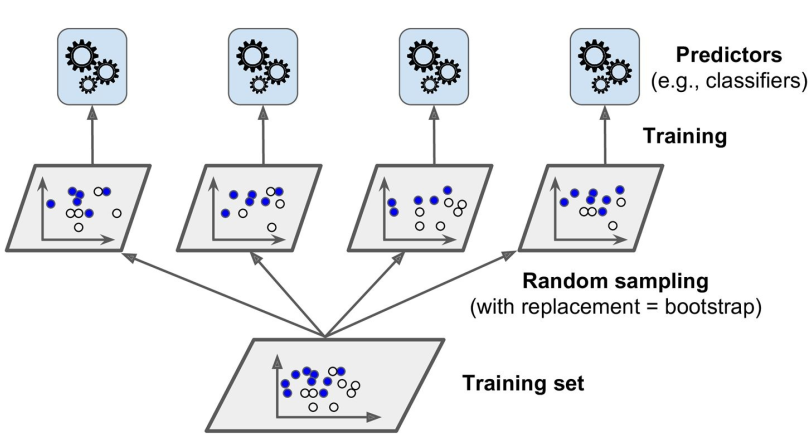

Bagging conjuntos de entrenamiento muestreados \
Tomada de Géron, A. (2017)

+ En el escenario de predicción, se considere a $\hat{y}_{n+1,m}$ la predicción obtenida de la $m$-ésima muestra bootstrap, donce $m = 1 , \ldots, M$, con $M$ un entero suficientemente grande, con lo cual la predicción bagged es:
$$ \hat{y}_{n+1,bag} = \frac{1}{M} \sum_{m = 1}^{M} \hat{y}_{n+1,m} $$ para los árboles de clasificación se puede reemplazar el promedio muestral por la *mayoria de votos* de las $M$ predicciones bootstrap para alcanzar el efecto Bagging.

+ Los árboles de decisión de las muestras bootstrap en la práctica no consideran un proceso de regularización, es decir crecen profundo y no son podados, bajo la idea de mantener el sesgo lo más pequeño posible en cada árbol.

+ En el contexto de datos de series de tiempo, se requiere aplicar métodos bootstrap más adecuados, en la literatura se mencionan métodos como: *block bootsrap, wild bootstrap,* y *frequency domain bootstrap*. A continuación se amplian detalles del método más referenciado en la literatura:
    + **block bootstrap**: en este método secciones contiguas de la serie de tiempo se seleccionan aleatoriamente y se unen conjuntamente.

+ Error de estimación *out-of-bag*: aproximadamente $2/3$ de los conjuntos de entrenamiento remuestreados configuran el ajuste de los modelos de árboles bagged, las observaciones restantes que no se usan en el ajuste son llamadas out-of-bag (OOB), y con los modelos ajustados se predice la variable respuesta de cada conjunto OOB, lo que arrojaría alrededor de $M/3$ predicciones, las cuales se promedian para obtener una única predicción.

## Random Forest

Es el mismo método Bagging con un pequeño cambio para reducir la correlación entre los árboles, en el cual se modifica el proceso de construciión de los árboles. Considere $p$ variables explicativas y sea $m \leq p$ un entero positivo, usualmente $m < p$ tal que $ m \approx \sqrt{p}$, para construir el árbol dada una muestra de entrenamiento bootstrap en la predicción aleatoria, en cada tiempo se considera una partición:
+ se escoge una muestra de $m$ predictores de las $p$ variables explicativas para ser usadas como variables candidatas de partición, así en la partición sólo se puede usar uno de esos $m$ predictores seleccionados aleatoriamente
+ en cada partición del árbol se considera una nueva muestra aleatoria de $m$ predictores. 

El razonamiento para usar este proceso surge a partir de evitar la probabilidad que todos los árboles en el Random Forest sean dominados por un único predictor (como puede ocurrir en Bagging).

En el contexto de series de tiempo debido a la estructura de dependencia, los predictores fuertes tienden a ocurrir en datos de series de tiempo, entonces para obtener un buen ajuste del modelo se requiere incluir dichos predictores, por lo que hay que tener precaución al alplicar Random Forest en presencia de autocorrelación fuerte. Se ha demostrado empíricamente que esta metodología trabaja mejor cuando los predictores son tan independientes uno del otro como sea posible.

## XGBoosting

In [42]:
from statsmodels.tsa.arima.model import ARIMA #https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
from statsmodels.tsa.statespace.sarimax import SARIMAX #https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [43]:
#ajuste de un AR(12)
AR=ARIMA(dif_remesas,order=(12,0,0),trend='c') # ‘c’ indicates a constant term, ‘t’ indicates a linear trend in time, and ‘ct’ includes both
fitAR=AR.fit() 
print(fitAR.summary()) #son significativos AR1-AR4 y AR12

                               SARIMAX Results                                
Dep. Variable:             BC_remesas   No. Observations:                  271
Model:                ARIMA(12, 0, 0)   Log Likelihood                 100.097
Date:                jue, 27 oct 2022   AIC                           -172.194
Time:                        20:10:40   BIC                           -121.764
Sample:                    01-01-2000   HQIC                          -151.946
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0117      0.004      2.952      0.003       0.004       0.019
ar.L1         -0.5947      0.061     -9.680      0.000      -0.715      -0.474
ar.L2         -0.5018      0.074     -6.751      0.0

+ AR final

In [44]:
#ar_orden=[1,1,1,1,1,1,1,1,1,1,0,1] # ar.L10: -0.092
#ar_orden=[1,1,1,1,1,1,1,1,1,0,0,1] #ar.L9: 0.090 
#ar_orden=[1,1,1,1,1,1,1,1,0,0,0,1] #ar.L8: 0.764
#ar_orden=[1,1,1,1,1,1,1,0,0,0,0,1] #ar.L7: 0.828 
#ar_orden=[1,1,1,1,1,1,0,0,0,0,0,1] #ar.L6: 0.034 (significativo!!!) #ar.L5: 0.117
#ar_orden=[1,1,1,1,0,1,0,0,0,0,0,1] #ar.L6: 0.123
ar_orden=[1,1,1,1,0,0,0,0,0,0,0,1]
AR12 = SARIMAX(dif_remesas, trend='c', order=(ar_orden,0,0))  
fit2AR12=AR12.fit()

In [45]:
print(fit2AR12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          BC_remesas   No. Observations:                  271
Model:             SARIMAX([1, 2, 3, 4, 12], 0, 0)   Log Likelihood                  93.379
Date:                             jue, 27 oct 2022   AIC                           -172.759
Time:                                     20:10:47   BIC                           -147.544
Sample:                                 01-01-2000   HQIC                          -162.635
                                      - 07-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0264      0.011      2.295      0.022       0.004       0.049
ar.L1         -0.5636      

In [46]:
MA=ARIMA(dif_remesas,order=(0,0,12),trend='c') # ‘c’ indicates a constant term, ‘t’ indicates a linear trend in time, and ‘ct’ includes both
fit_MA=MA.fit() 
print(fit_MA.summary()) #son significativos MA1-MA2 y MA12

                               SARIMAX Results                                
Dep. Variable:             BC_remesas   No. Observations:                  271
Model:                ARIMA(0, 0, 12)   Log Likelihood                  86.486
Date:                jue, 27 oct 2022   AIC                           -144.972
Time:                        20:10:55   BIC                            -94.542
Sample:                    01-01-2000   HQIC                          -124.724
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.005      2.603      0.009       0.003       0.021
ma.L1         -0.5729      0.065     -8.810      0.000      -0.700      -0.445
ma.L2         -0.1635      0.062     -2.652      0.0

/home/fm/anaconda3/envs/TCI_FM/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


+ MA final

In [47]:
#ma_orden=[1,1,1,1,1,1,1,1,1,1,0,1] #ma.L10: 0.290
#ma_orden=[1,1,1,1,1,1,1,1,1,0,0,1] #ma.L9: 0.005 (significativo) # ma.L8: 0.159 
#ma_orden=[1,1,1,1,1,1,1,0,1,0,0,1] #ma.L7: 0.471
#ma_orden=[1,1,1,1,1,1,0,0,1,0,0,1] #ma.L6:0.461
ma_orden=[1,1,1,1,1,0,0,0,1,0,0,1] 
MA12 = SARIMAX(dif_remesas, trend='c', order=(0,0,ma_orden))  
fit2_MA12=MA12.fit()

In [48]:
print(fit2_MA12.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                BC_remesas   No. Observations:                  271
Model:             SARIMAX(0, 0, [1, 2, 3, 4, 5, 9, 12])   Log Likelihood                  83.568
Date:                                   jue, 27 oct 2022   AIC                           -149.136
Time:                                           20:11:02   BIC                           -116.717
Sample:                                       01-01-2000   HQIC                          -136.119
                                            - 07-01-2022                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0120      0.005      2.665      0.008    

In [49]:
ARMA12 = SARIMAX(dif_remesas, trend='c', order=(12,0,12))
fit_ARMA12=ARMA12.fit()

In [50]:
print(fit_ARMA12.summary()) # los coeficientes del MA no son significativos

                               SARIMAX Results                                
Dep. Variable:             BC_remesas   No. Observations:                  271
Model:             SARIMAX(12, 0, 12)   Log Likelihood                 107.308
Date:                jue, 27 oct 2022   AIC                           -162.615
Time:                        20:11:16   BIC                            -68.960
Sample:                    01-01-2000   HQIC                          -125.012
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0124      0.012      0.996      0.319      -0.012       0.037
ar.L1         -0.2238      0.309     -0.724      0.469      -0.829       0.382
ar.L2          0.1624      0.287      0.566      0.5

+ ARMA final 

In [51]:
#ar_orden=[1,1,1,1,1,1,1,1,1,1,0,1] #ar.L10: 0.089 
#ma_orden=[1,1,1,1,1,1,1,1,1,1,0,1] #ma.L10: 0.142
#ar_orden=[1,1,1,1,1,1,1,1,1,0,0,1] #ar.L9: 0.173 
#ma_orden=[1,1,1,1,1,1,1,1,1,0,0,1] #ma.L9: 0.476
#ar_orden=[1,1,1,1,1,1,1,1,0,0,0,1] #ar.L8: 0.151 
#ma_orden=[1,1,1,1,1,1,1,1,0,0,0,1] #ma.L8: 0.000 (significativo!!!) # ma.L7: 0.978
#ar_orden=[1,1,1,1,1,1,1,0,0,0,0,1] #ar.L7:0.227
#ma_orden=[1,1,1,1,1,1,0,1,0,0,0,1] #ma.L6: 0.196
#ar_orden=[1,1,1,1,1,1,0,0,0,0,0,1] #ar.L6: 0.215
#ma_orden=[1,1,1,1,1,0,0,1,0,0,0,1] #ma.L5: 0.186
#ar_orden=[1,1,1,1,1,0,0,0,0,0,0,1] #ar.L5: 0.185
#ma_orden=[1,1,1,1,0,0,0,1,0,0,0,1] #ma.L4: 0.09
#ar_orden=[1,1,1,1,0,0,0,0,0,0,0,1] #ar.L4: 0.074
#ma_orden=[1,1,1,0,0,0,0,1,0,0,0,1] #ma.L3: 0.201
#ar_orden=[1,1,1,0,0,0,0,0,0,0,0,1] #ar.L3: 0.000 (significativo!!!)
#ma_orden=[1,1,0,0,0,0,0,1,0,0,0,1] #ma.L8: 0.485 
#ar_orden=[1,1,1,0,0,0,0,0,0,0,0,1] #ar.L1: 0.358
#ma_orden=[1,1,0,0,0,0,0,0,0,0,0,1] #ma.L12: 0.123
ar_orden=[0,1,1,0,0,0,0,0,0,0,0,1] #ar.L1: 0.358
ma_orden=[1,1,0,0,0,0,0,0,0,0,0,0] #ma.L12: 0.123
ARMA12 = SARIMAX(dif_remesas, order=(ar_orden,0,ma_orden))
fit_ARMA12=ARMA12.fit()

In [52]:
print(fit_ARMA12.summary()) 

                                   SARIMAX Results                                   
Dep. Variable:                    BC_remesas   No. Observations:                  271
Model:             SARIMAX([2, 3, 12], 0, 2)   Log Likelihood                  88.119
Date:                       jue, 27 oct 2022   AIC                           -164.239
Time:                               20:11:33   BIC                           -142.626
Sample:                           01-01-2000   HQIC                          -155.561
                                - 07-01-2022                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2          0.2903      0.049      5.918      0.000       0.194       0.386
ar.L3          0.2643      0.048      5.468      0.000       0.170       0.

## Referencias

+ Tsay, R. S., & Chen, R. (2018). Nonlinear time series analysis (Vol. 891). John Wiley & Sons.
+ Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.
+ Hyndman, R. J. (2018). George athanasopoulos. Forecasting: Principles and Practice. Monash University, Australia, 2, 23.